<a href="https://colab.research.google.com/github/alvinwalker314/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

(0, 3)

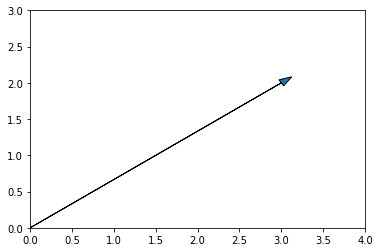

In [5]:
#creating and plotting vector
a= [3, 2]
plt.arrow(0, 0, a[0], a[1], head_width= 0.1)
plt.xlim(0, 4)
plt.ylim(0, 3)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [9]:
#The norm of a vector is its magnitude
b= [17, -4, -2, -1]
b_norm= np.linalg.norm(b)
b_norm

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [10]:
#These vectors are not orthogonal because their dot product is not 0
c= [3, 7, -2, 12]
d= [9, -7, 4, 6]
np.dot(c, d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [15]:
#created e matrix
e= np.array([[7, 4, 2],[1, 3, -1], [2, 6, -4]])

#found the inverse of e
inv_e= np.linalg.inv(e)

#found e Transpose
e_trans= e.T

#print
print(inv_e) 
print(e_trans)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [95]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

#means
cust_mean= df['customers'].mean()
snow_mean= df['snow'].mean()

#varience
cust_var= np.var(df['customers'])
snow_var= np.var(df['snow'])

#standard deviation
cust_std= df['customers'].std()
snow_std= df['snow'].std()

#print
print(cust_mean, cust_var, cust_std)
print(snow_mean, snow_var, snow_std)

1135.7142857142858 84653.06122448981 314.26406851866597
2.7142857142857144 7.346938775510203 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#They are comparable, due to customers high mean, varience, and std, it's data is much more spread out than snow. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [28]:
#varience co-varience matrix
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [53]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

#dropped country
new_df= df.drop('Country', axis=1)

#grabbed countries to plot later
countries= df.loc[:, 'Country']

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [0]:
#created an instance of standard scaler to standardize my data
scaler= StandardScaler()

#fit data to scaler
scaler.fit(new_df)

#standardize data
standard_data=scaler.transform(new_df)

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
#created a pca instance with 4 components
pca= PCA(4)

#fit data to pca
pca.fit(standard_data)

#created components 
components=pca.transform(standard_data)

#grabbed 1st and 2nd components
component_1= components.T[0]
component_2= components.T[1]



Text(0, 0.5, 'PC2')

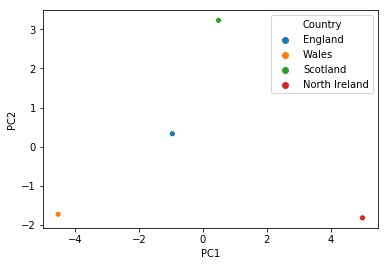

In [62]:
#plot components 1 and 2 with country
sns.scatterplot(x= component_1, y= component_2, hue= countries)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

#standardized my data
scaler= StandardScaler()
scaler.fit(points)
standard_data= scaler.transform(points)

#grabbed x and y standard data to plot
x_standard_data= standard_data.T[0]
y_standard_data= standard_data.T[1]

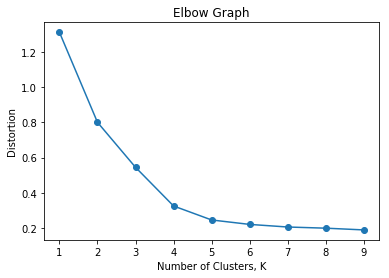

In [107]:
#empty list that will hold distortions
distortions = []

#setting K to equal numbers in the range of 1-10 exclusive
K = range(1,10)

#iterating through each amount of clusters and finding the average distances between points and centroids
for k in K:
    #creating a model for each iteration of K
    Model = KMeans(n_clusters=k).fit(standard_data)
    #fitting standardized data into model
    Model.fit(standard_data)
    #appending the mean of the sums of datapoints to their centroids for that model
    distortions.append(sum(np.min(cdist(standard_data, Model.cluster_centers_, 'euclidean'), axis=1)) / standard_data.shape[0])

#plotting number of clusters used to the average distance of datapoints to clusters
plt.plot(K, distortions, 'o-')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Distortion')
plt.title('Elbow Graph')
plt.show()

In [0]:
#created a cluster model with 4 clusters
k_model= KMeans(n_clusters= 4)

#fit my standardized data into model
k_model.fit(standard_data)

#grabbed the labels for each cluster
model_labels= k_model.labels_

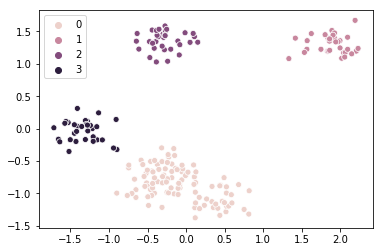

In [103]:
#plotted data
sns.scatterplot(x= x_standard_data, y= y_standard_data, hue= model_labels)